In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib.ticker import MaxNLocator
# make np load also look in the logs directory


In [2]:
import matplotlib.ticker as ticker

formatter = ticker.ScalarFormatter(useOffset=True, useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-5, 10))

In [3]:
color_bound_global = "#af2a63"
color_simu_global = "#35b897"

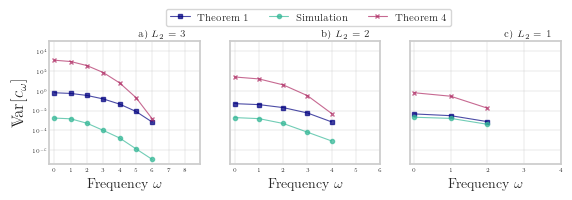

In [4]:
freqs_large = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_06_subperiodic_layers_05/05500_theta_samples/freqs.npy"
)
freqs_medium = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_04_subperiodic_layers_05/05500_theta_samples/freqs.npy"
)
freqs_small = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_02_subperiodic_layers_05/05500_theta_samples/freqs.npy"
)

theo_large = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_06_subperiodic_layers_05/05500_theta_samples/abs_coeffs_theory.npy"
)
theo_medium = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_04_subperiodic_layers_05/05500_theta_samples/abs_coeffs_theory.npy"
)
theo_small = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_02_subperiodic_layers_05/05500_theta_samples/abs_coeffs_theory.npy"
)

simu_small = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_02_subperiodic_layers_05/05500_theta_samples/abs_coeffs_var.npy"
)
simu_large = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_06_subperiodic_layers_05/05500_theta_samples/abs_coeffs_var.npy"
)
simu_medium = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_04_subperiodic_layers_05/05500_theta_samples/abs_coeffs_var.npy"
)

bound_simu_large = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_06_subperiodic_layers_05/05500_theta_samples/abs_coeffs_upper_bound_local.npy"
)
bound_simu_medium = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_04_subperiodic_layers_05/05500_theta_samples/abs_coeffs_upper_bound_local.npy"
)
bound_simu_small = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_global_qubits_08_encoding_qubits_02_subperiodic_layers_05/05500_theta_samples/abs_coeffs_upper_bound_local.npy"
)
# Create a figure with shared y-axis
sns.set(style="whitegrid")
matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)
label_fontsize = 10
legend_fontsize = 7
epsilon_fontsize = 7
linewidth = 0.8
markersize = 3
text_fontsize = 11
ticks_fontsize = 4

fig, axs = plt.subplots(1, 3, figsize=(6.6, 1.6), sharey=True)
# First subplot
# condition_small = simu_large > 10 ** (-30)
axs[0].set_ylabel(r"$\Var[c_\omega]$")
axs[0].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[0].plot(
    freqs_large,
    theo_large,
    marker="s",
    color="navy",
    label=r"Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs_large,
    bound_simu_large,
    marker="x",
    color=color_bound_global,
    label="Upper bound local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs_large,
    simu_large,
    marker="o",
    color=color_simu_global,
    label="Sampling local",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)

# Second subplot
axs[1].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[1].plot(
    freqs_medium,
    theo_medium,
    marker="s",
    color="navy",
    label=r"Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs_medium,
    bound_simu_medium,
    marker="x",
    color=color_bound_global,
    label="Upper bound local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs_medium,
    simu_medium,
    marker="o",
    color=color_simu_global,
    label="Sampling local",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)

# Third subplot
condition_large = simu_small > 10 ** (-30)
axs[2].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[2].plot(
    freqs_small,
    theo_small,
    marker="s",
    color="navy",
    label=r"Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs_small,
    simu_small,
    marker="o",
    color=color_simu_global,
    label="Simulation",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs_small,
    bound_simu_small,
    marker="x",
    color=color_bound_global,
    label=r"Theorem 4",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
# Set axes to logarithmic scale
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")
# Add legend to the last subplot
axs[2].legend(fontsize=legend_fontsize, bbox_to_anchor=(0.3, 1.3), ncol=3)
axs[0].grid(linewidth=0.3)
axs[1].grid(linewidth=0.3)
axs[2].grid(linewidth=0.3)

axs[0].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[0].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)
axs[1].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[1].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2, pad=-4)
axs[2].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[2].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)

axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[2].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[1].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[2].yaxis.get_offset_text().set_fontsize(ticks_fontsize)

# set xlim of axes to 8 leave xmin unchanged
axs[0].set_xlim(right=8.9)
axs[1].set_xlim(right=6)
axs[2].set_xlim(right=4)

axs[0].set_ylim(top=10**5)

# formatter.set_scientific(True)
# formatter.set_powerlimits((-1, 6))
# axs[0].yaxis.set_major_formatter(formatter)
# axs[1].yaxis.set_major_formatter(formatter)
# axs[2].yaxis.set_major_formatter(formatter)
fig.text(
    0.26,
    0.91,
    r"a) $L_2$" + " = 3",
    fontsize=epsilon_fontsize,
)
fig.text(
    0.537,
    0.91,
    r"b) $L_2$" + " = 2",
    fontsize=epsilon_fontsize,
)
fig.text(
    0.814,
    0.91,
    r"c) $L_2$" + " = 1",
    fontsize=epsilon_fontsize,
)
# plt.tight_layout()
plt.show()

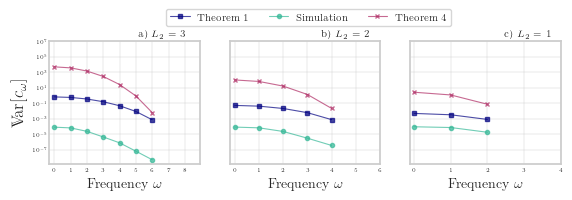

In [8]:
freqs_large = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_06_subperiodic_layers_05/05500_theta_samples/freqs.npy"
)
freqs_medium = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_04_subperiodic_layers_05/05500_theta_samples/freqs.npy"
)
freqs_small = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_02_subperiodic_layers_05/05500_theta_samples/freqs.npy"
)

theo_large = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_06_subperiodic_layers_05/05500_theta_samples/abs_coeffs_theory.npy"
)
theo_medium = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_04_subperiodic_layers_05/05500_theta_samples/abs_coeffs_theory.npy"
)
theo_small = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_02_subperiodic_layers_05/05500_theta_samples/abs_coeffs_theory.npy"
)

simu_small = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_02_subperiodic_layers_05/05500_theta_samples/abs_coeffs_var.npy"
)
simu_large = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_06_subperiodic_layers_05/05500_theta_samples/abs_coeffs_var.npy"
)
simu_medium = np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_04_subperiodic_layers_05/05500_theta_samples/abs_coeffs_var.npy"
)

bound_simu_large = 4 * np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_06_subperiodic_layers_05/05500_theta_samples/abs_coeffs_upper_bound_local.npy"
)
bound_simu_medium = 4 * np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_04_subperiodic_layers_05/05500_theta_samples/abs_coeffs_upper_bound_local.npy"
)
bound_simu_small = 4 * np.load(
    "../logs/pauli_encoding/BackwardsLightCone_local_qubits_08_encoding_qubits_02_subperiodic_layers_05/05500_theta_samples/abs_coeffs_upper_bound_local.npy"
)
# Create a figure with shared y-axis
sns.set(style="whitegrid")
matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)
label_fontsize = 10
legend_fontsize = 7
epsilon_fontsize = 7
linewidth = 0.8
markersize = 3
text_fontsize = 11
ticks_fontsize = 4

fig, axs = plt.subplots(1, 3, figsize=(6.6, 1.6), sharey=True)
# First subplot
# condition_small = simu_large > 10 ** (-30)
axs[0].set_ylabel(r"$\Var[c_\omega]$")
axs[0].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[0].plot(
    freqs_large,
    theo_large,
    marker="s",
    color="navy",
    label=r"Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs_large,
    bound_simu_large,
    marker="x",
    color=color_bound_global,
    label="Upper bound local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs_large,
    simu_large,
    marker="o",
    color=color_simu_global,
    label="Sampling local",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)

# Second subplot
axs[1].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[1].plot(
    freqs_medium,
    theo_medium,
    marker="s",
    color="navy",
    label=r"Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs_medium,
    bound_simu_medium,
    marker="x",
    color=color_bound_global,
    label="Upper bound local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs_medium,
    simu_medium,
    marker="o",
    color=color_simu_global,
    label="Sampling local",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)

# Third subplot
condition_large = simu_small > 10 ** (-30)
axs[2].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[2].plot(
    freqs_small,
    theo_small,
    marker="s",
    color="navy",
    label=r"Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs_small,
    simu_small,
    marker="o",
    color=color_simu_global,
    label="Simulation",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs_small,
    bound_simu_small,
    marker="x",
    color=color_bound_global,
    label=r"Theorem 4",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
# Set axes to logarithmic scale
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")
# Add legend to the last subplot
axs[2].legend(fontsize=legend_fontsize, bbox_to_anchor=(0.3, 1.3), ncol=3)
axs[0].grid(linewidth=0.3)
axs[1].grid(linewidth=0.3)
axs[2].grid(linewidth=0.3)

axs[0].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[0].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)
axs[1].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[1].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2, pad=-4)
axs[2].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[2].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)

axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[2].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[1].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[2].yaxis.get_offset_text().set_fontsize(ticks_fontsize)

# set xlim of axes to 8 leave xmin unchanged
axs[0].set_xlim(right=8.9)
axs[1].set_xlim(right=6)
axs[2].set_xlim(right=4)
axs[0].set_ylim(top=10**7)

# formatter.set_scientific(True)
# formatter.set_powerlimits((-1, 6))
# axs[0].yaxis.set_major_formatter(formatter)
# axs[1].yaxis.set_major_formatter(formatter)
# axs[2].yaxis.set_major_formatter(formatter)
fig.text(
    0.26,
    0.91,
    r"a) $L_2$" + " = 3",
    fontsize=epsilon_fontsize,
)
fig.text(
    0.537,
    0.91,
    r"b) $L_2$" + " = 2",
    fontsize=epsilon_fontsize,
)
fig.text(
    0.814,
    0.91,
    r"c) $L_2$" + " = 1",
    fontsize=epsilon_fontsize,
)
# plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'figs_numerics/lightcone_Bound_global_exp_gol.pgf'

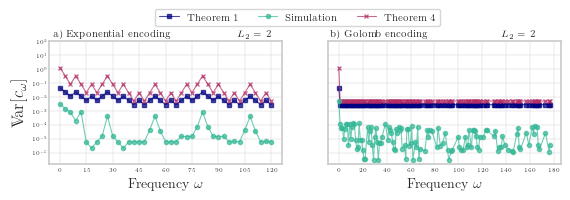

In [9]:
freqs_exponential = np.load(
    "../logs/enhanced_pauli_encoding/BackwardsLightCone_global_qubits_06_encoding_qubits_04_subperiodic_layers_01/03000_theta_samples/freqs.npy"
)
freqs_golomb = np.load(
    "../logs/golomb_encoding/BackwardsLightCone_global_qubits_06_encoding_qubits_04_subperiodic_layers_01/03000_theta_samples/freqs.npy"
)
freqs_exponential = [int(freq) for freq in freqs_exponential]
freqs_golomb = [int(freq) for freq in freqs_golomb]

theo_exponential = np.load(
    "../logs/enhanced_pauli_encoding/BackwardsLightCone_global_qubits_06_encoding_qubits_04_subperiodic_layers_01/03000_theta_samples/abs_coeffs_theory.npy"
)
theo_golomb = np.load(
    "../logs/golomb_encoding/BackwardsLightCone_global_qubits_06_encoding_qubits_04_subperiodic_layers_01/03000_theta_samples/abs_coeffs_theory.npy"
)

simu_exponential = np.load(
    "../logs/enhanced_pauli_encoding/BackwardsLightCone_global_qubits_06_encoding_qubits_04_subperiodic_layers_01/03000_theta_samples/abs_coeffs_var.npy"
)
simu_golomb = np.load(
    "../logs/golomb_encoding/BackwardsLightCone_global_qubits_06_encoding_qubits_04_subperiodic_layers_01/03000_theta_samples/abs_coeffs_var.npy"
)

bound_simu_exponential = np.load(
    "../logs/enhanced_pauli_encoding/BackwardsLightCone_global_qubits_06_encoding_qubits_04_subperiodic_layers_01/03000_theta_samples/abs_coeffs_upper_bound_local.npy"
)
bound_simu_golomb = np.load(
    "../logs/golomb_encoding/BackwardsLightCone_global_qubits_06_encoding_qubits_04_subperiodic_layers_01/03000_theta_samples/abs_coeffs_upper_bound_local.npy"
)
# Create a figure with shared y-axis
sns.set(style="whitegrid")
matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)
label_fontsize = 10
legend_fontsize = 7
epsilon_fontsize = 7
linewidth = 0.8
markersize = 3
text_fontsize = 11
ticks_fontsize = 4

fig, axs = plt.subplots(1, 2, figsize=(6.6, 1.6), sharey=True)
# First subplot
# condition_small = simu_large > 10 ** (-30)
axs[0].set_ylabel(r"$\Var[c_\omega]$")
axs[0].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[0].plot(
    freqs_exponential,
    theo_exponential,
    marker="s",
    color="navy",
    label=r"Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs_exponential,
    bound_simu_exponential,
    marker="x",
    color=color_bound_global,
    label="Upper bound local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs_exponential,
    simu_exponential[freqs_exponential],
    marker="o",
    color=color_simu_global,
    label="Sampling local",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)

# Second subplot
axs[1].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[1].plot(
    freqs_golomb,
    theo_golomb,
    marker="s",
    color="navy",
    label=r"Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs_golomb,
    simu_golomb[freqs_golomb],
    marker="o",
    color=color_simu_global,
    label="Simulation",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs_golomb,
    bound_simu_golomb,
    marker="x",
    color=color_bound_global,
    label="Theorem 4",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)


# Set axes to logarithmic scale
axs[0].set_yscale("log")
axs[1].set_yscale("log")
# Add legend to the last subplot
axs[1].legend(fontsize=legend_fontsize, bbox_to_anchor=(0.5, 1.3), ncol=3)
axs[0].grid(linewidth=0.3)
axs[1].grid(linewidth=0.3)

axs[0].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[0].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)
axs[1].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[1].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2, pad=-4)

axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[1].yaxis.get_offset_text().set_fontsize(ticks_fontsize)

# set xlim of axes to 8 leave xmin unchanged
# axs[0].set_xlim(right=8.9)
# axs[1].set_xlim(right=6)
axs[0].set_ylim(top=10**2)

# formatter.set_scientific(True)
# formatter.set_powerlimits((-1, 6))
# axs[0].yaxis.set_major_formatter(formatter)
# axs[1].yaxis.set_major_formatter(formatter)
# axs[2].yaxis.set_major_formatter(formatter)
fig.text(
    0.13,
    0.91,
    "a) Exponential encoding",
    fontsize=epsilon_fontsize,
)
fig.text(
    0.55,
    0.91,
    "b) Golomb encoding",
    fontsize=epsilon_fontsize,
)
fig.text(
    0.41,
    0.91,
    r"$L_2$" + " = 2",
    fontsize=epsilon_fontsize,
)
fig.text(
    0.81,
    0.91,
    r"$L_2$" + " = 2",
    fontsize=epsilon_fontsize,
)
# plt.tight_layout()
#plt.savefig("figs_numerics/lightcone_Bound_global_exp_gol.pgf", bbox_inches="tight")
plt.show()